In [2]:
import cirq
import qiskit
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

### Cirq: Quantum Fourier Transform Circuits

In [3]:
"""Pass in the qubits into the quantum Fourier transform circuit."""
def cirq_quantum_fourier_transform(qubits) -> None:
    n = len(qubits)
    circuit = cirq.Circuit()

    for i in range(n):
        circuit.append(cirq.H(qubits[i]))
        for j in range(i + 1, n):
            circuit.append(cirq.CZ(qubits[j], qubits[i]) ** (1 / (2 ** (j - i))))
    
    # Swapping
    for i in range(n // 2):
        circuit.append(cirq.SWAP(qubits[i], qubits[n - i - 1]))

    return circuit


num_qubits = 5
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
circuit = cirq_quantum_fourier_transform(qubits)
print(circuit)

                  ┌───────┐   ┌────────────┐   ┌───────────────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@────────────────@───────────────────────────────────────────────────────────×───
          │        │           │                │                                                           │
1: ───────@^0.5────┼─────H─────┼──────@─────────┼───────@───────────@───────────────────────────────────×───┼───
                   │           │      │         │       │           │                                   │   │
2: ────────────────@^0.25──────┼──────@^0.5─────┼───────┼─────H─────┼──────@─────────@──────────────────┼───┼───
                               │                │       │           │      │         │                  │   │
3: ────────────────────────────@^(1/8)──────────┼───────@^0.25──────┼──────@^0.5─────┼─────H────@───────×───┼───
                                                │                   │                │          │           │
4: ───────────

### Qiskit: Quantum Fourier Transform Circuits

In [4]:
"""Pass the qubits into the quantum Fourier transform circuit"""
def qiskit_quantum_fourier_transform(n) -> QuantumCircuit:
    circuit = QuantumCircuit(n)

    for i in range(n):
        circuit.h(i)
        for j in range(i + 1, n):
            circuit.cp(1 / (2 ** (j - i)), j, i)

    # Swapping
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    
    return circuit

num_qubits = 5
circuit = qiskit_quantum_fourier_transform(num_qubits)
print(circuit.draw())

     ┌───┐                                                                  »
q_0: ┤ H ├─■────────■──────────────■───────────────────■────────────────────»
     └───┘ │P(0.5)  │        ┌───┐ │                   │                    »
q_1: ──────■────────┼────────┤ H ├─┼──────────■────────┼───────────■────────»
                    │P(0.25) └───┘ │          │P(0.5)  │           │        »
q_2: ───────────────■──────────────┼──────────■────────┼───────────┼────────»
                                   │P(0.125)           │           │P(0.25) »
q_3: ──────────────────────────────■───────────────────┼───────────■────────»
                                                       │P(0.0625)           »
q_4: ──────────────────────────────────────────────────■────────────────────»
                                                                            »
«                                                              
«q_0: ───────────────────────────────────────────────────────X─
«             

                  ┌───────┐   ┌────────────┐   ┌───────────────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@────────────────@───────────────────────────────────────────────────────────×───
          │        │           │                │                                                           │
1: ───────@^0.5────┼─────H─────┼──────@─────────┼───────@───────────@───────────────────────────────────×───┼───
                   │           │      │         │       │           │                                   │   │
2: ────────────────@^0.25──────┼──────@^0.5─────┼───────┼─────H─────┼──────@─────────@──────────────────┼───┼───
                               │                │       │           │      │         │                  │   │
3: ────────────────────────────@^(1/8)──────────┼───────@^0.25──────┼──────@^0.5─────┼─────H────@───────×───┼───
                                                │                   │                │          │           │
4: ───────────

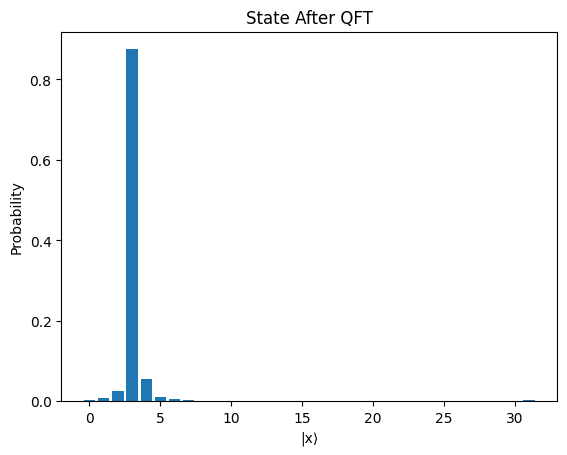

10.666666666666666


In [8]:
num_qubits = 5
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
state = [np.exp(-2j * np.pi * i / 10) / np.sqrt(2 ** 5) for i in range(32)]

# Create the full circuit with state preparation and QFT
circuit = cirq_quantum_fourier_transform(qubits)
print(circuit)
    
# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.simulate(circuit, initial_state=state)
state_vector = result.final_state_vector
state_probs = np.abs(state_vector[:2**num_qubits]) ** 2
state_probs = list(state_probs)
    
plt.bar(range(len(state_probs)), state_probs)
plt.xlabel("|x⟩")
plt.ylabel("Probability")
plt.title("State After QFT")
plt.show()

print(2 ** 5 / state_probs.index(max(state_probs)))